###  Problem Statement: Predict the first Innings score in a ODI

**Tasks:** <br>

1.Use “groupby” operation, to find the average number of runs, scored by each country,
and represent it on a bar graph.<br>

2.Handle Missing values:
    a. If there are null values in continuous numerical column, replace the null values by
        the mean of that column
    b. If there are null values in ordinal numerical column, replace the null values by the
        mode of that column
    c. If there are null values in categorical column, replace the null values by the mode
        of that column
    d. If more than 50%the values in a column are null, then drop that entire column<br>

3.Remove the columns, that you think, do not contribute to the total score, in the first
innings.<br>

4.Convert the categorical columns (if any), to numeric, using one hot encoding/ dummy
encoding.<br>

5.Perform train-test-split<br>

6.Perform Feature scaling<br>

7.Use
a. Use Linear Regression
b. Use Decision Tree Regression
c. Use Random Forest Regression<br>

8.Evaluate the model and Apply prediction.<br>

**Importing libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

**Import Dataset**

In [2]:
df=pd.read_csv('odi.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [4]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

<AxesSubplot:xlabel='bat_team'>

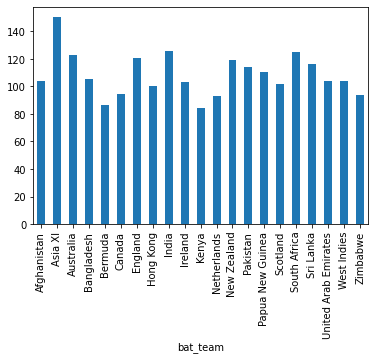

In [5]:
df.groupby('bat_team').mean()['runs'].plot(kind="bar")

In [6]:
df.shape

(350899, 15)

In [7]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

**Analysis**<br>
This shows us their are no null values in each column.<br>

## EXPLORATORY DATA ANALYSIS

In [8]:
#Uderstanding the basic information of the data like min, max, mean and standard deviation etc.
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


In [9]:
#This displays general information about the dataset with informations like the column names their data types 
#and the count of non-null values for every column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [10]:
#Gives the data types of all the columns values in the dataframe
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

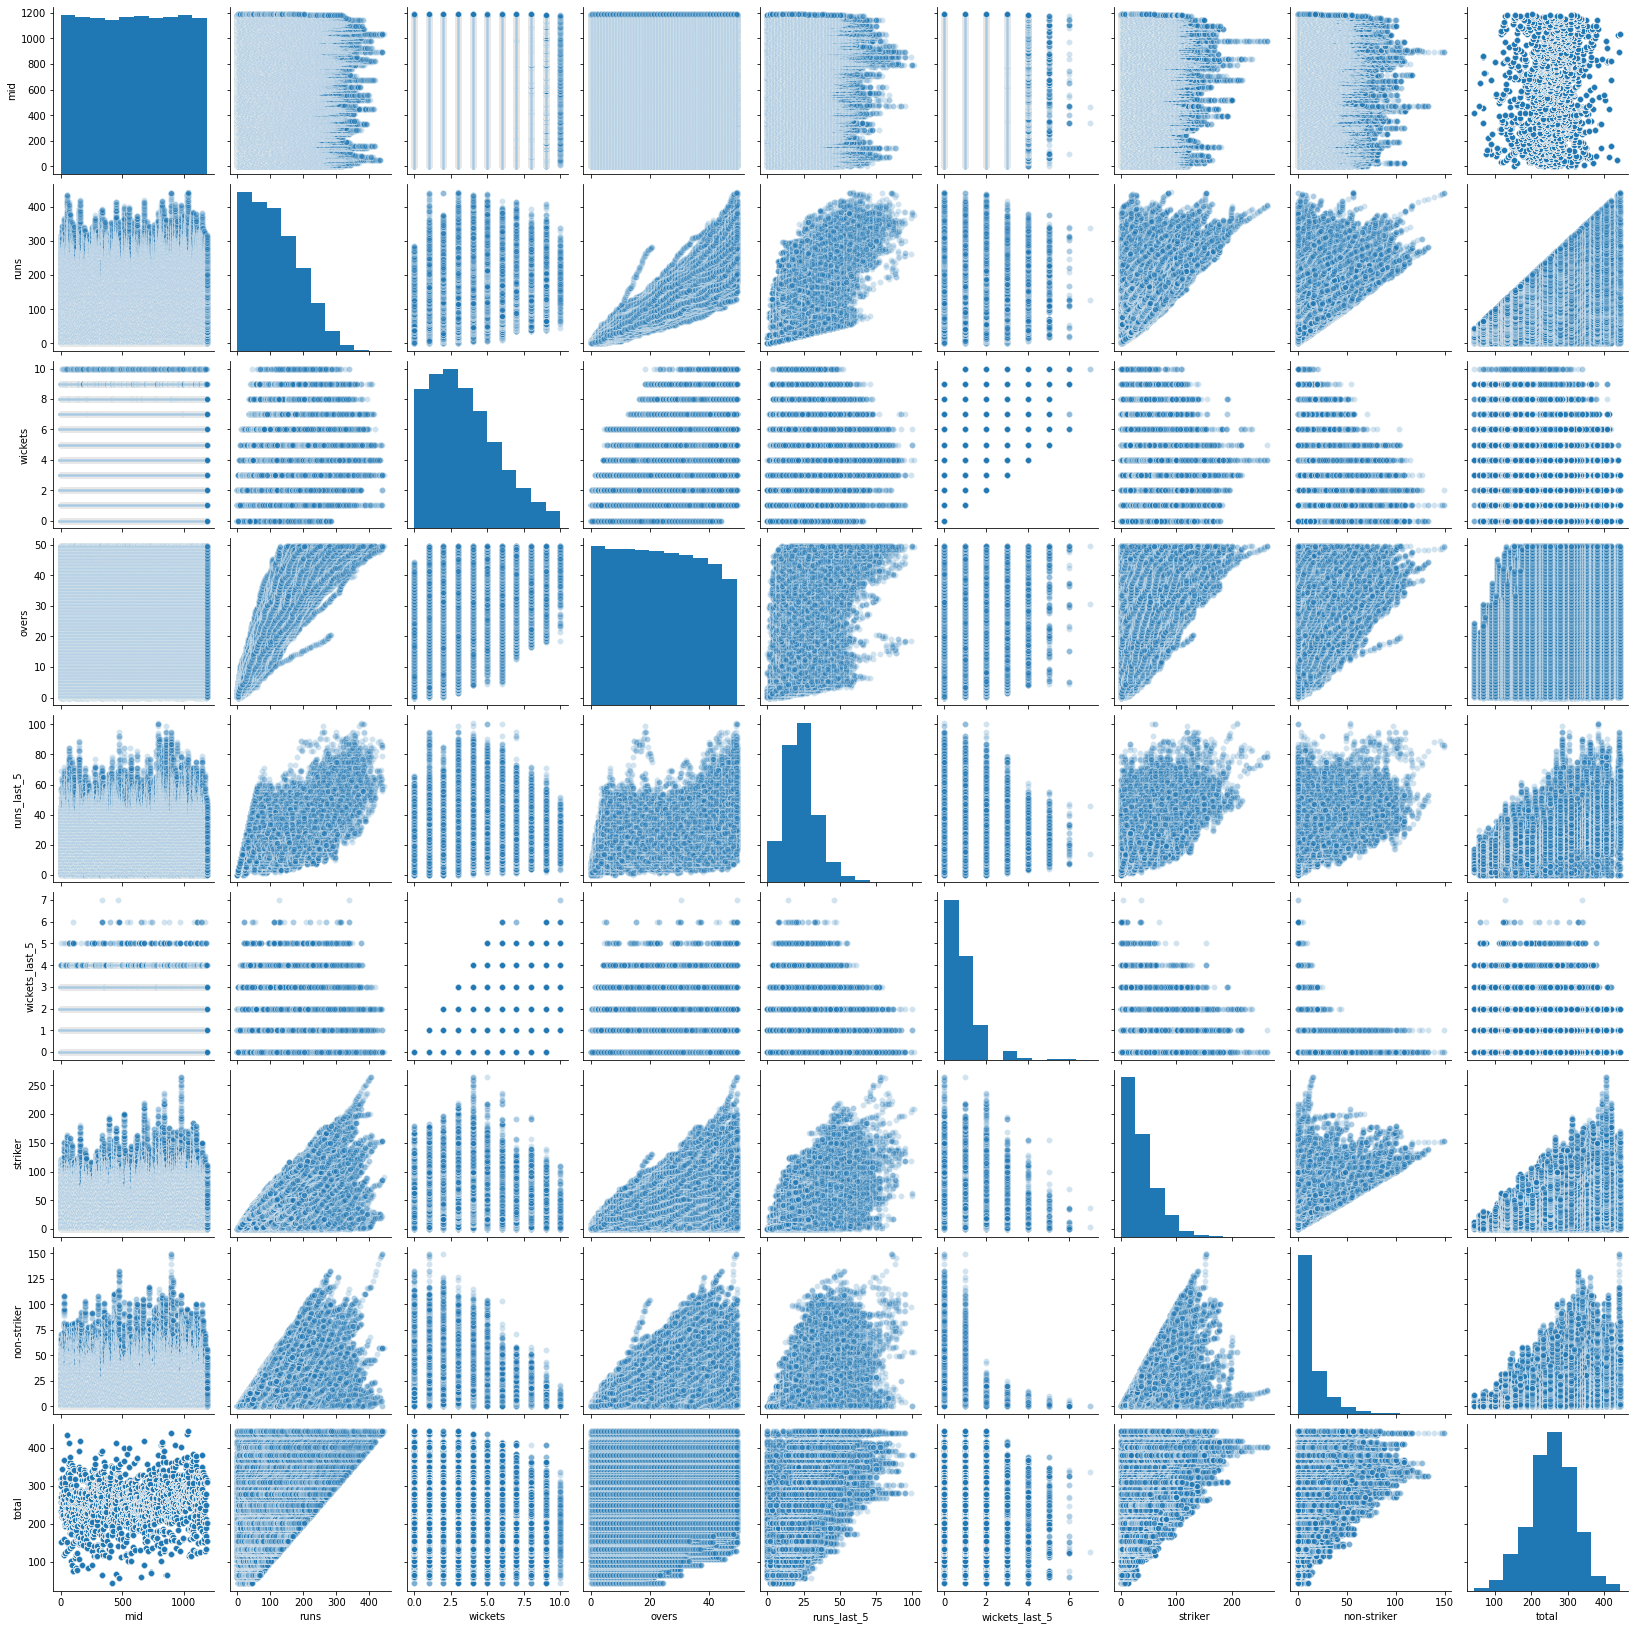

In [11]:
sns.pairplot(data=df,plot_kws={'alpha':0.2})

E:\Anaconda\lib\site-packages\seaborn\matrix.py:277: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  cmap=self.cmap, **kws)


<AxesSubplot:title={'center':'Feature Correlation Heat Map'}>

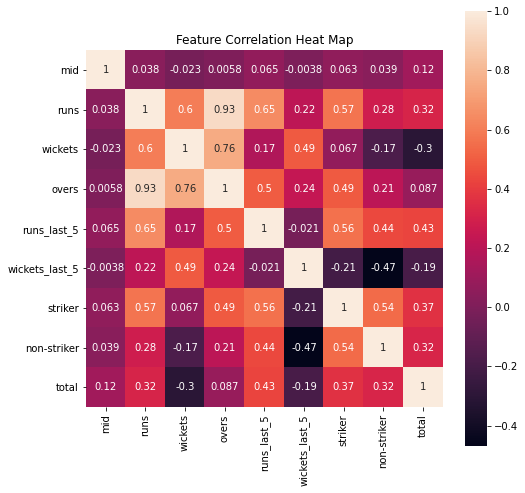

In [12]:
plt.figure(figsize =(8,8))
plt.title('Feature Correlation Heat Map')
sns.heatmap(df.corr(),linewidths=.1,vmax=1.0,
            square=True,linecolor='',annot=True)

In [13]:
#skewness and kurtosis
print("Skewness: %f" % df['total'].skew())
print("Kurtosis: %f" % df['total'].kurt())

Skewness: -0.133298
Kurtosis: 0.166178


## ONE HOT ENCODING

In [14]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team','batsman','bowler','date','venue'])
encoded_df.columns

Index(['mid', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'striker', 'non-striker', 'total', 'bat_team_Afghanistan',
       ...
       'venue_Vidarbha Cricket Association Ground',
       'venue_Vidarbha Cricket Association Stadium, Jamtha',
       'venue_Wankhede Stadium', 'venue_Warner Park, Basseterre',
       'venue_Western Australia Cricket Association Ground',
       'venue_Westpac Stadium', 'venue_Willowmoore Park',
       'venue_Windsor Park, Roseau', 'venue_Zahur Ahmed Chowdhury Stadium',
       'venue_Zohur Ahmed Chowdhury Stadium'],
      dtype='object', length=2876)

In [15]:
encoded_df.head()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,bat_team_Afghanistan,...,venue_Vidarbha Cricket Association Ground,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium,"venue_Warner Park, Basseterre",venue_Western Australia Cricket Association Ground,venue_Westpac Stadium,venue_Willowmoore Park,"venue_Windsor Park, Roseau",venue_Zahur Ahmed Chowdhury Stadium,venue_Zohur Ahmed Chowdhury Stadium
0,1,0,0,0.1,0,0,0,0,301,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0.2,0,0,0,0,301,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,0,0.3,4,0,0,0,301,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6,0,0.4,6,0,0,0,301,0,...,0,0,0,0,0,0,0,0,0,0
4,1,6,0,0.5,6,0,0,0,301,0,...,0,0,0,0,0,0,0,0,0,0


## TRAIN-TEST SPLIT

In [16]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0

    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)
X = df.iloc[:,[7,8,9,12,13]].values
y = df.iloc[:, 14].values


# Splitting the df into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




## LINEAR REGRESSION

In [17]:
# Training the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

# Testing the dataset on trained model
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

# Testing with a custom input
import numpy as np
new_prediction = lin.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)


R square value: 52.737657811129445
Custom accuracy: 43.354801937874036
Prediction score: [322.42983935]


In [21]:
lin.fit(X_train, y_train)
# save the model to disk
filename = 'linear_regression.pkl'
pickle.dump(lin, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

## RANDOM FOREST REGRESSOR

In [22]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)


In [23]:

# Training the dataset
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_features=None)
reg.fit(X_train,y_train)

# Testing the dataset on trained model
y_pred = reg.predict(X_test)
score = reg.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

# Testing with a custom input
import numpy as np
new_prediction = reg.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)



R square value: 79.50034227847028
Custom accuracy: 77.04759190652608
Prediction score: [319.81]


In [24]:
reg.fit(X_train, y_train)
# save the model to disk
filename = 'random_forest_regressor.pkl'
pickle.dump(reg, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

## DECISION TREE REGRESSION

In [25]:
# Decision Tree Regression Model
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

D_T = tree.DecisionTreeRegressor(max_depth=8,random_state=42)
D_T.fit(X_train, y_train)
y_pred_dt = D_T.predict(X_test)
print('The Score on the training set with a decision tree regressor is:',D_T.score(X_train,y_train))
print('The Score on the test set with a decision tree regressor is:',D_T.score(X_test,y_test))

# The Root mean squared error
print("Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, y_pred_dt)))

# The R^2 score 
print("The r2_score is: ", r2_score(y_test, y_pred_dt))

The Score on the training set with a decision tree regressor is: 0.5306501287962557
The Score on the test set with a decision tree regressor is: 0.5279863011024877
Mean squared error: 42.83
The r2_score is:  0.5279863011024877


In [26]:
D_T.fit(X_train, y_train)
# save the model to disk
filename = 'decision_tree_regression.pkl'
pickle.dump(D_T, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

We can compare all the models by checking their R2 score.<br>
Condition: <br>
* If R2 score is near to 1 -> Best model<br>
* If R2 score is near to 0 -> Worst model<br>

**Models**<br>
Linear Regression :-     0.37<br>
Decison tree Regressor:-      0.80<br>
Random Forest Regressor:- 0.90<br>

So from observing the "R2 score" we conclude that *RANDOM FOREST REGRESSOR* is the best model for predicitng the price of the second hand car. 

In [27]:

def predict_score(bat_team='Chennai Super Kings', bowl_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_last_5=50, wickets_last_5=0):
    temp_array = list()

      # Batting Team
    if bat_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif bat_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif bat_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif bat_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif bat_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif bat_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif bat_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif bat_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

      # Bowling Team
    if bowl_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif bowl_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif bowl_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif bowl_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif bowl_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif bowl_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif bowl_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif bowl_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

      # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
    temp_array = temp_array + [overs, runs, wickets, runs_last_5, wickets_last_5]

      # Converting into numpy array
    temp_array = np.array([temp_array])

      # Prediction
    return int(lin.predict(temp_array)[0])

In [28]:
final_score = predict_score(bat_team='England', bowl_team='Ireland', overs=0.1, runs=0, wickets=0, runs_last_5=0, wickets_last_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 253 to 268
